# Область 1. Библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy.stats import iqr, boxcox
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

from sklearn.datasets import load_breast_cancer


#sklearn.set_config(transform_output="pandas")

#print(sklearn.__version__)

# Область работы 2 (выполнение лучшей модели)

In [2]:
# Путь к тренировочному набору
path_train = 'train_house_С.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test_house_С.csv' # содержит только имя файла, без имен папок

df_train = pd.read_csv(path_train)
X_test = pd.read_csv(path_test)

df_train.drop_duplicates(inplace=True)

X_train = df_train.drop(columns = 'price')
y_train = df_train.price

In [3]:
#COLUMN TRANSFORMER

impf = ['4', '28', '23', '15', '8', '13', '10', '11', '26', '21'] #из подбора impf

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

#MODEL

CT_rf = ColumnTransformer([
        ("num", num_transformer, impf)
        ], remainder='drop').set_output(transform='pandas')


pipe_RF_finale = Pipeline([('preprocessing', CT_rf),
                    ('classifier', RandomForestRegressor(criterion='absolute_error', max_depth=10, max_features='log2',
                                                          min_samples_leaf = 2, min_samples_split=5, n_estimators=500))])
pipe_RF_finale.fit(X_train, y_train)
pipe_RF_finale

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['4', '28', '23', '15', '8',
                                                   '13', '10', '11', '26',
                                                   '21'])])),
                ('classifier',
                 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                       max_features='log2', min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=500))])

# Область 3. Предикт

In [4]:
y_predict = pipe_RF_finale.predict(X_test)
y_predict

array([3988178.95, 4066973.05, 3795753.5 , 7762827.1 , 3829389.55,
       3715374.25, 5105135.  , 5363354.5 , 3742291.7 , 5081552.7 ,
       6790521.08, 3178161.  , 3706878.35, 4678870.  , 3805321.1 ,
       4308087.7 , 3872884.4 , 3877275.5 , 3996289.5 , 5264434.  ,
       5183139.5 , 5425080.5 , 4307737.7 , 5496123.5 , 3207243.2 ,
       4631830.7 , 3441568.2 , 6535436.88, 3981236.7 , 4626541.5 ,
       3382083.6 , 4261453.  , 3160084.2 , 3197170.2 , 3198139.7 ,
       3789828.7 , 4109917.  , 2680321.7 , 4990748.  , 6785481.5 ,
       5818274.  , 2780533.  , 3354110.2 , 3457479.2 , 4520376.  ,
       4312035.  , 3927265.65, 6992971.86, 4265800.  , 4435641.  ,
       3042137.7 , 6167630.  , 5331672.5 , 5588985.5 , 3892836.5 ,
       7051502.5 , 5353793.2 , 4896843.  , 4717818.  , 5910705.5 ,
       6795341.  , 5753258.  , 2968119.  , 2992066.7 , 4428991.  ,
       3907137.5 , 4245703.  , 2730231.  , 6611325.7 , 4098402.  ,
       2889831.  , 4390053.5 , 3027549.7 , 6570840.5 , 4208678

In [5]:
print('Отобранные столбцы')
print(*impf)

Отобранные столбцы
4 28 23 15 8 13 10 11 26 21


In [8]:
impf

['4', '28', '23', '15', '8', '13', '10', '11', '26', '21']

(137,) (137,)
Отрицательные цены -  0
Max Error: 5,499,988
 
----------------------
   MAPE Error: 16.52
----------------------


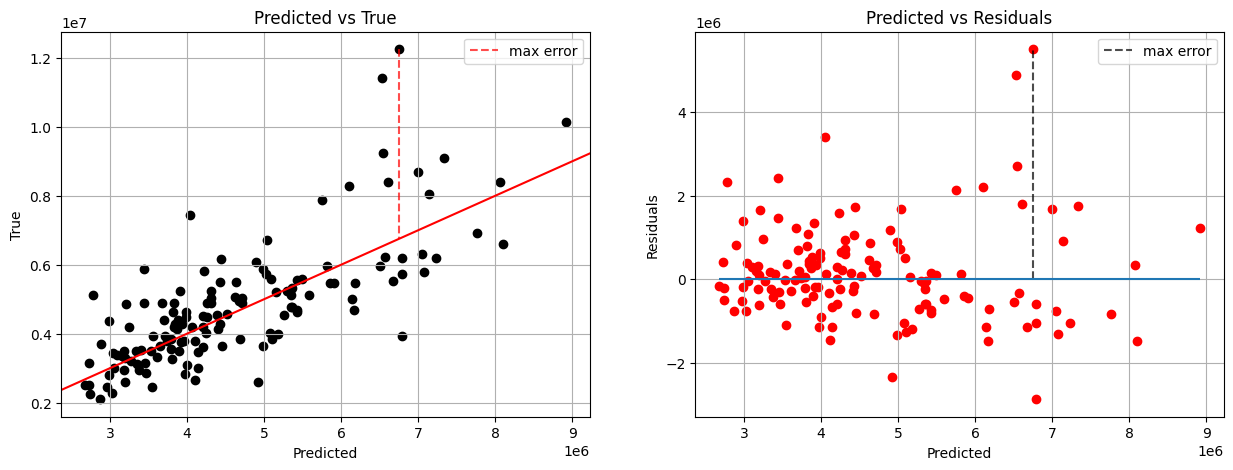

In [6]:
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y_true = pd.read_csv("test_Y_true_house_С.csv").values.reshape(-1)
print(y_predict.shape, y_true.shape)
print('Отрицательные цены - ', sum(y_predict<0))

def plot_2_error(y_true, y_predicted):
    residuals = y_true - y_predicted
    max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
    max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
    max_true, max_pred = y_true[max_idx], y_predicted[max_idx]
    mape = mean_absolute_percentage_error(y_true, y_predict)
    print("Max Error:", "{:,.0f}".format(max_error))
    print(' ')
    print('----------------------')
    print("   MAPE Error:", "{:,.2f}".format(mape*100))
    print('----------------------')

    ## Plot predicted vs true
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    from statsmodels.graphics.api import abline_plot
    ax[0].scatter(y_predicted, y_true, color="black")
    abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
    ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
    ax[0].grid(True)
    ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
    ax[0].legend()

    ## Plot predicted vs residuals
    ax[1].scatter(y_predicted, residuals, color="red")
    ax[1].vlines(x=max_pred, ymin=0, ymax=max_error, color='black', linestyle='--', alpha=0.7, label="max error")
    ax[1].grid(True)
    ax[1].set(xlabel="Predicted", ylabel="Residuals", title="Predicted vs Residuals")
    ax[1].hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    ax[1].legend()
    plt.show()

plot_2_error(y_true, y_predict)

In [9]:
mask = impf
import pickle
with open('saved_dictionary_с.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

color_dict = pd.Series(loaded_dict).to_frame().reset_index().sort_values(by=0).reset_index(drop=True)
color = (color_dict['index'].isin(mask)).map({True: 'background-color: yellow', False: ''})
color_dict.style.apply(lambda s: color)

,index,0
0,2,1
1,28,airconditioning
2,13,area
3,4,area bathrooms
4,3,area bedrooms
5,1,area stories
6,7,basement
7,23,bathrooms
8,21,bathrooms stories
9,6,bedrooms
